In [0]:
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop,Adam
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D,AveragePooling2D
from keras import models
from keras.models import Model
from keras.layers import concatenate 
from keras.layers import Dropout
import tensorflow
import keras
from keras import utils as np_utils
from keras.datasets import cifar10
import PIL
import cv2
from google.colab.patches import cv2_imshow
import scipy.misc
import os
import matplotlib
from keras.callbacks import LearningRateScheduler
import math
from keras.utils.np_utils import to_categorical

##data

In [0]:
input_layer = Input(shape=(64, 64, 3))

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
path = '/content/data'
os.mkdir(path)

FileExistsError: ignored

In [0]:
#for i in range(0,50000):
  #im = np.array(cv2.resize(train_features[i], (64,64)))
  #scipy.misc.imsave('/content/data/'+i+'.jpg', im)
  #matplotlib.image.imsave('/content/data/'+str(i)+'.jpg', im)
train_features = np.array([cv2.resize(img, (64,64)) for img in train_features[:,:,:,:]])
test_features = np.array([cv2.resize(img, (64,64)) for img in test_features[:,:,:,:]])

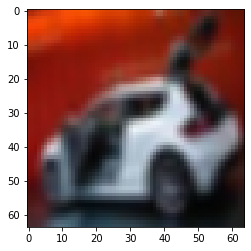

In [0]:
plt.imshow(test_features[6])

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)
np_cate

##model-1

In [0]:
def inception_module_v1(input_img,filter_1x1_size,filter_3x3_size,filter_reduce_3x3,filter_5x5_size,filter_5x5_reduce,maxpool_reduce):
  layer_1 = Conv2D(filter_1x1_size, (1,1), padding='same', activation='relu')(input_img)

  layer_2 = Conv2D(filter_reduce_3x3, (1,1), padding='same', activation='relu')(input_img)
  
  layer_2 = Conv2D(filter_3x3_size, (3,3), padding='same', activation='relu')(layer_2)

  layer_3 = Conv2D(filter_5x5_reduce, (1,1), padding='same', activation='relu')(input_img)

  layer_3 = Conv2D(filter_5x5_size, (5,5), padding='same', activation='relu')(layer_3)

  #layer_4 = Conv2D(filter_7x7_reduce, (1,1), padding='same', activation='relu')(input_img)

  #layer_4 = Conv2D(filter_7x7_size, (7,7), padding='same', activation='relu')(layer_4)

  layer_5 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)

  layer_5 = Conv2D(maxpool_reduce, (1,1), padding='same', activation='relu')(layer_5)

  conc = concatenate([layer_1,layer_2,layer_3,layer_5], axis = 3)
  
  return conc


In [0]:
layer_1 = Conv2D(64, (7,7), padding='same', activation='relu')(input_layer)

maxpool_2 = MaxPooling2D((3,3), strides=(2,2), padding='same')(layer_1)

layer_3 = Conv2D(64, (1,1), strides=(1,1),padding='same', activation='relu')(maxpool_2)

layer_4 = Conv2D(192, (3,3), padding='same', activation='relu')(layer_3)

maxpool_5 = MaxPooling2D((3,3), strides=(2,2), padding='same')(layer_4)

inception_6 =  inception_module_v1(maxpool_5 , 64 , 96 , 128, 16, 32, 32)

inception_7 = inception_module_v1(inception_6 , 128 , 128 , 192, 32, 96, 64)

maxpool_8 = MaxPooling2D((3,3), strides=(2,2), padding='same')(inception_7)

inception_9 =  inception_module_v1(maxpool_8 , 192 , 96 , 208, 16, 48, 64)

#############################################################################
x1 = AveragePooling2D((5, 5), strides=3)(inception_9)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(10, activation='softmax', name='auxilliary_output_1')(x1)
#############################################################################

inception_10 =  inception_module_v1(inception_9 , 160 , 112 , 224, 24, 64, 64)

inception_11 =  inception_module_v1(inception_10 , 128 , 128 , 256, 24, 64, 64)

inception_12 =  inception_module_v1(inception_11 , 112 , 144 , 228, 32, 64, 64)
##############################################################################
x2 = AveragePooling2D((5, 5), strides=3)(inception_12)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(10, activation='softmax', name='auxilliary_output_2')(x2)
##############################################################################

inception_13 =  inception_module_v1(inception_12 , 256 , 160 , 320, 32, 128, 128)

maxpool_14 = MaxPooling2D((3,3), strides=(2,2), padding='same')(inception_13)

inception_14 =  inception_module_v1(maxpool_14 , 256 , 160 ,320 , 32, 128, 128)

inception_15 =  inception_module_v1(inception_14 , 384 , 192 , 384, 48, 128, 128)

avgpool_16 = GlobalAveragePooling2D()(inception_15)

drop_17 = Dropout(0.4)(avgpool_16)

x3 = Dense(10, activation='softmax', name='output')(drop_17)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "inception_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 64)   4160        max_pooling2d_1[0][0]            
_______________________________________________________________________________________

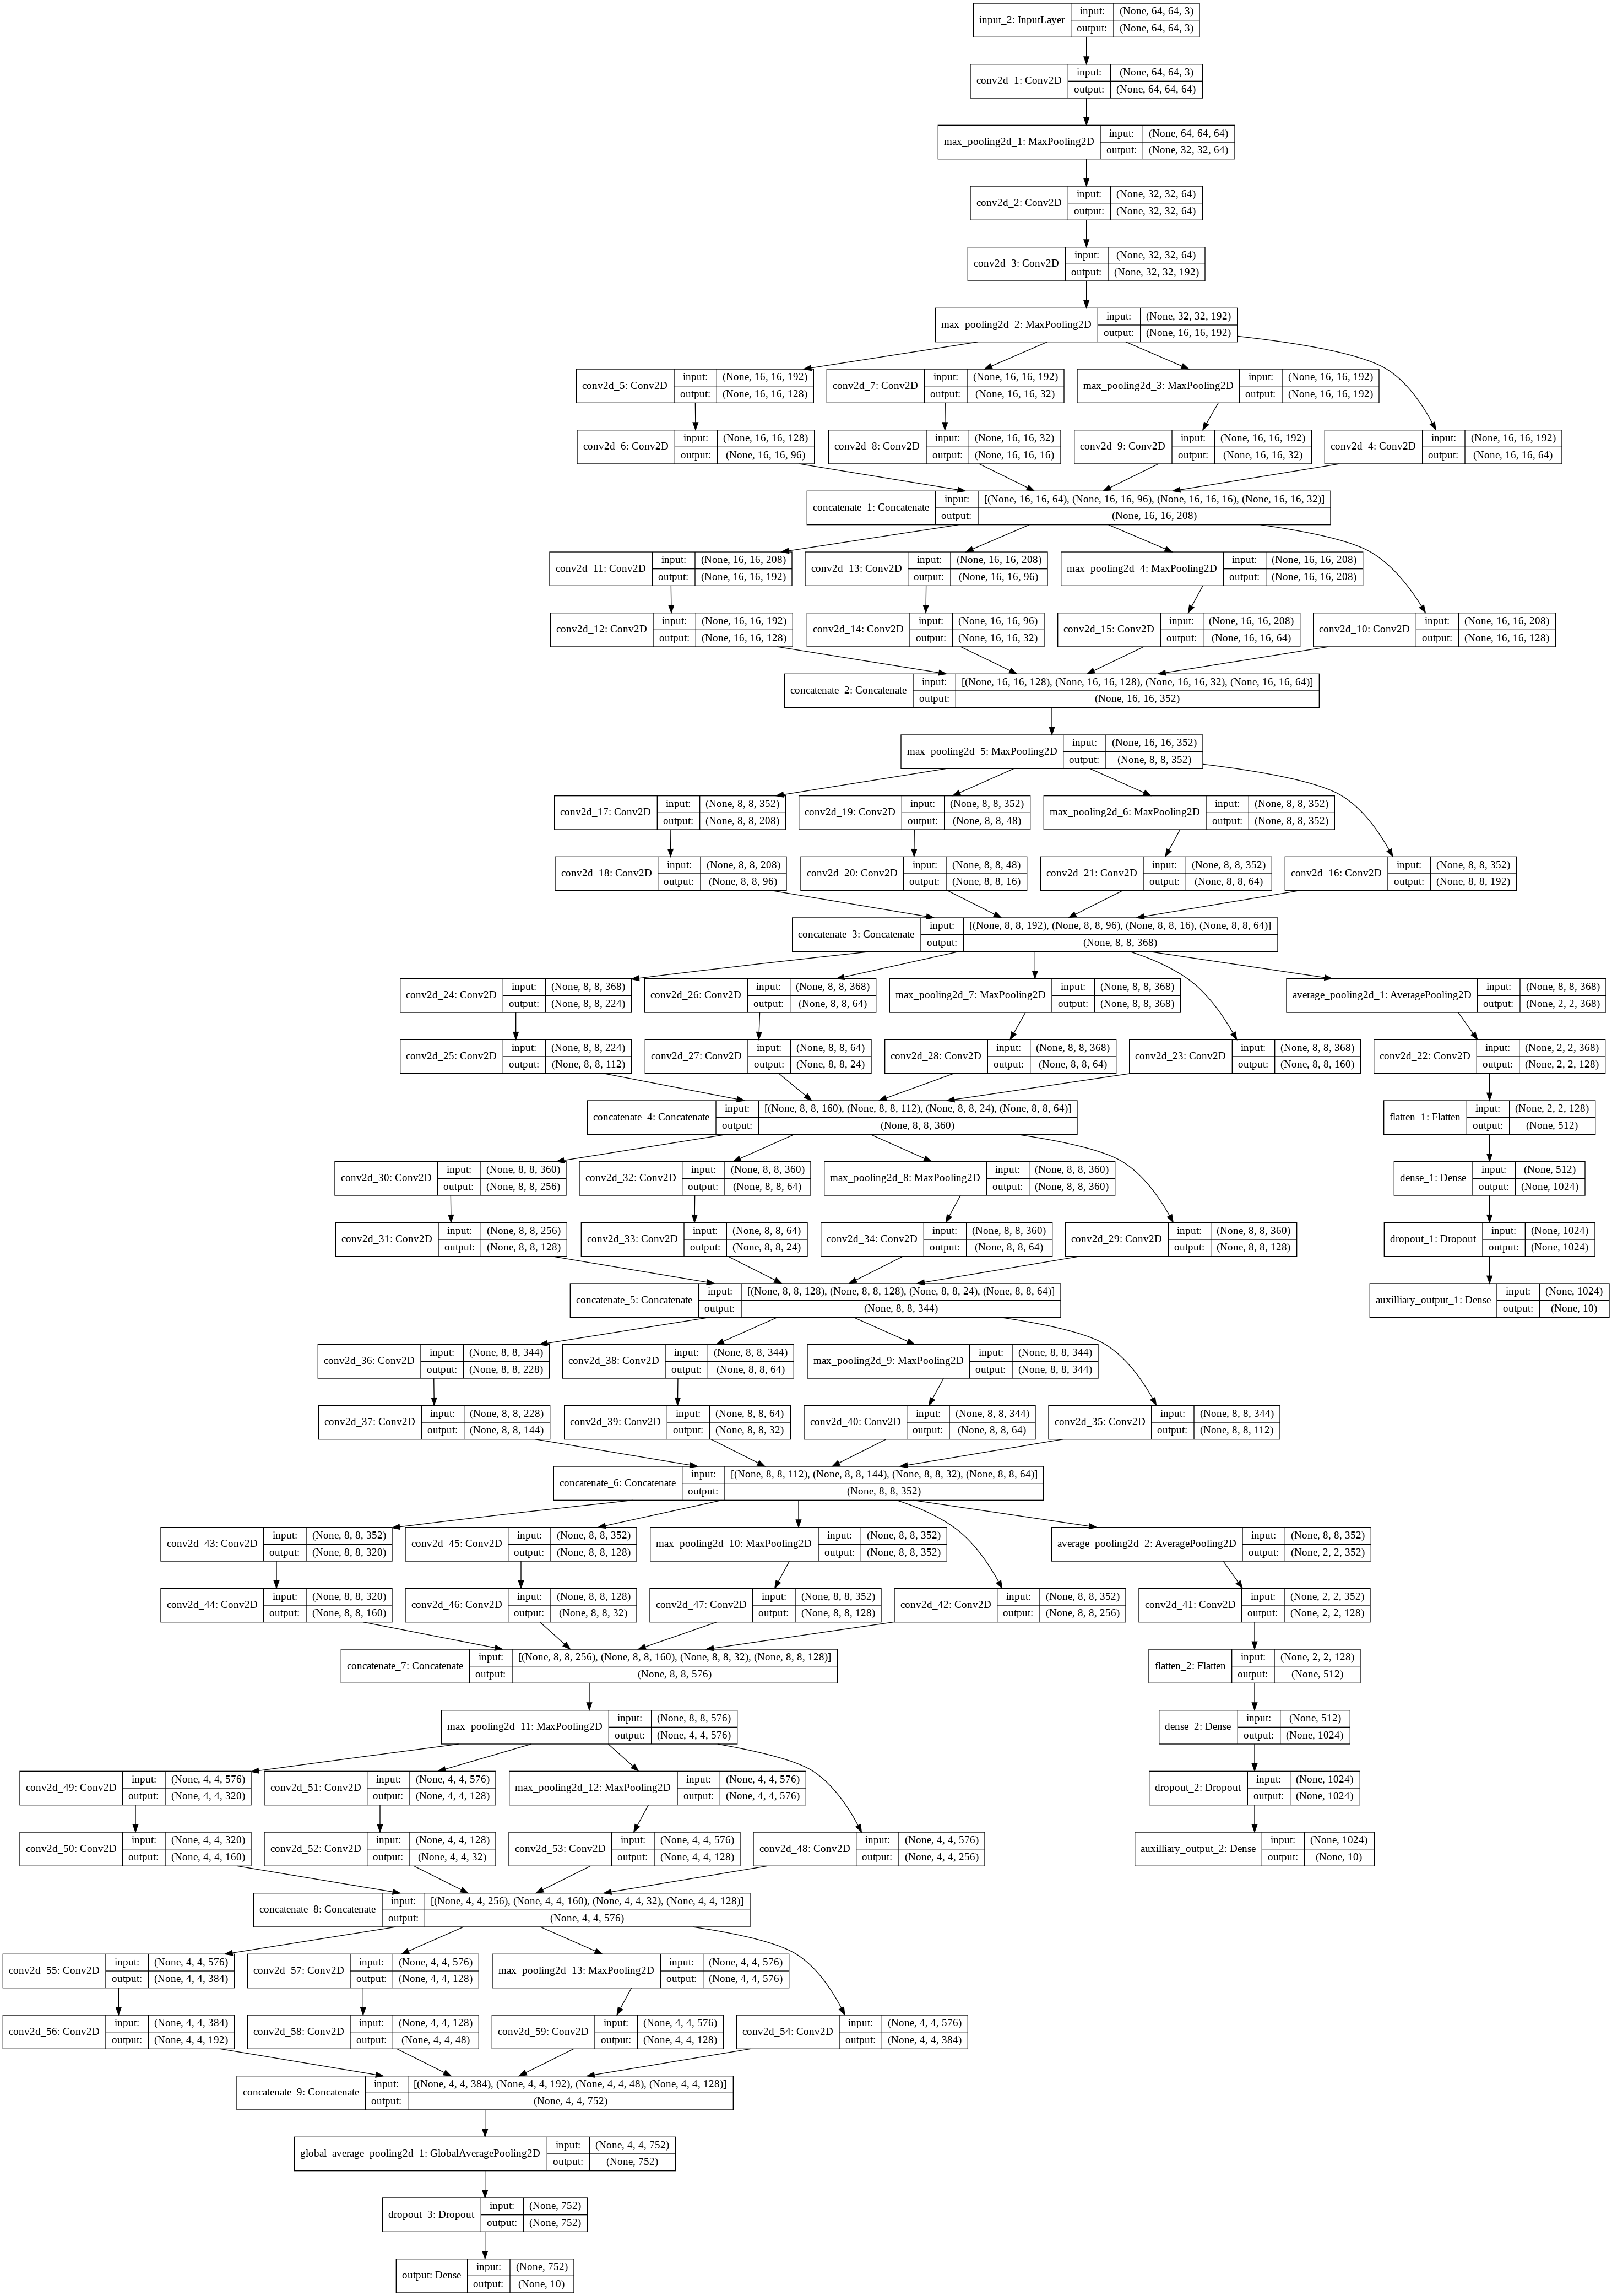

In [0]:
model_3 = Model(input_layer, [x1, x2, x3], name='inception_v1')
model_3.summary()
plot_model(model_3, to_file='model_3.png', show_shapes=True, show_layer_names=True)

In [0]:
print(np.shape(train_features))

(50000, 64, 64, 3)


In [0]:
epochs = 25
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

In [0]:


model_3.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])
#model_3.evaluate(test_features, test_labels, verbose=0 ,batch_size=32)

In [0]:
history = model_3.fit(train_features, [train_labels, train_labels, train_labels], validation_data=(test_features, [test_labels, test_labels, test_labels]), epochs=epochs, batch_size=256, callbacks=[lr_sc])

Train on 50000 samples, validate on 10000 samples
Epoch 1/25

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
50000/50000 [==============================] - 147s 3ms/step - loss: 3.5511 - auxilliary_output_1_loss: 2.1949 - auxilliary_output_2_loss: 2.2606 - output_loss: 2.2600 - auxilliary_output_1_acc: 0.1709 - auxilliary_output_2_acc: 0.1387 - output_acc: 0.1357 - val_loss: 3.2245 - val_auxilliary_output_1_loss: 1.9765 - val_auxilliary_output_2_loss: 2.0770 - val_output_loss: 2.0830 - val_auxilliary_output_1_acc: 0.2681 - val_auxilliary_output_2_acc: 0.2293 - val_output_acc: 0.2105
Epoch 2/25

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
50000/50000 [==============================] - 133s 3ms/step - loss: 3.1226 - auxilliary_output_1_loss: 1.9253 - auxilliary_output_2_loss: 2.0041 - output_loss: 1.9868 - auxilliary_output_1_acc: 0.2783 - auxilliary_output_2_acc: 0.2376 - output_acc: 0.2446 - val_loss: 2.7962 - val_auxilliary_output_1_loss: 1.720

In [0]:
model_3.evaluate(test_features, [test_labels,test_labels,test_labels], verbose=0 ,batch_size=32)

[1.1680292345523835,
 0.7188665234804154,
 0.7516273000240326,
 0.7455816675186158,
 0.7761,
 0.771,
 0.7756]

##Model-2 

In [0]:
def inception_module_v2(input_img,filter_1x1_size,filter_3x3_reduce,filter_3x3_size,filter_5x5_reduce,filter_5x5_size,maxpool_reduce):
  layer_1 = Conv2D(filter_1x1_size, (1,1), padding='same', activation='relu')(input_img)

  layer_2 = Conv2D(filter_3x3_reduce, (1,1), padding='same', activation='relu')(input_img)
  
  layer_2 = Conv2D(filter_3x3_size, (3,3), padding='same', activation='relu')(layer_2)

  layer_3 = Conv2D(filter_5x5_reduce, (1,1), padding='same', activation='relu')(input_img)

  layer_3 = Conv2D(filter_5x5_size, (3,3), padding='same', activation='relu')(layer_3)

  layer_3 = Conv2D(filter_5x5_size, (3,3), padding='same', activation='relu')(layer_3)

  #layer_4 = Conv2D(filter_7x7_reduce, (1,1), padding='same', activation='relu')(input_img)

  #layer_4 = Conv2D(filter_7x7_size, (7,7), padding='same', activation='relu')(layer_4)

  layer_5 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)

  layer_5 = Conv2D(maxpool_reduce, (1,1), padding='same', activation='relu')(layer_5)

  conc = concatenate([layer_1,layer_2,layer_3,layer_5], axis = 3)
  
  return conc


In [0]:
def model_v2(input_layer):
  layer_1 = Conv2D(64, (7,7), padding='same', activation='relu')(input_layer)

  maxpool_2 = MaxPooling2D((3,3), strides=(2,2), padding='same')(layer_1)

  layer_3 = Conv2D(64, (1,1), strides=(1,1),padding='same', activation='relu')(maxpool_2)

  layer_4 = Conv2D(192, (3,3), padding='same', activation='relu')(layer_3)

  maxpool_5 = MaxPooling2D((3,3), strides=(2,2), padding='same')(layer_4)

  inception_6 =  inception_module_v2(maxpool_5 , 64 , 96 , 128, 16, 32, 32)

  inception_7 = inception_module_v2(inception_6 , 128 , 128 , 192, 32, 96, 64)

  maxpool_8 = MaxPooling2D((3,3), strides=(2,2), padding='same')(inception_7)

  inception_9 =  inception_module_v2(maxpool_8 , 192 , 96 , 208, 16, 48, 64)

  #############################################################################
  x1 = AveragePooling2D((5, 5), strides=3)(inception_9)
  x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
  x1 = Flatten()(x1)
  x1 = Dense(1024, activation='relu')(x1)
  x1 = Dropout(0.7)(x1)
  x1 = Dense(10, activation='softmax', name='auxilliary_output_1')(x1)
  #############################################################################

  inception_10 =  inception_module_v2(inception_9 , 160 , 112 , 224, 24, 64, 64)

  inception_11 =  inception_module_v2(inception_10 , 128 , 128 , 256, 24, 64, 64)

  inception_12 =  inception_module_v2(inception_11 , 112 , 144 , 228, 32, 64, 64)
  ##############################################################################
  x2 = AveragePooling2D((5, 5), strides=3)(inception_12)
  x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
  x2 = Flatten()(x2)
  x2 = Dense(1024, activation='relu')(x2)
  x2 = Dropout(0.7)(x2)
  x2 = Dense(10, activation='softmax', name='auxilliary_output_2')(x2)
  ##############################################################################

  inception_13 =  inception_module_v2(inception_12 , 256 , 160 , 320, 32, 128, 128)

  maxpool_14 = MaxPooling2D((3,3), strides=(2,2), padding='same')(inception_13)

  inception_14 =  inception_module_v2(maxpool_14 , 256 , 160 ,320 , 32, 128, 128)

  inception_15 =  inception_module_v2(inception_14 , 384 , 192 , 384, 48, 128, 128)

  avgpool_16 = GlobalAveragePooling2D()(inception_15)

  drop_17 = Dropout(0.4)(avgpool_16)

  x3 = Dense(10, activation='softmax', name='output')(drop_17)
  
  model = Model(input_layer, [x1, x2, x3], name='inception_v2')
  return model

Model: "inception_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_326 (Conv2D)             (None, 64, 64, 64)   9472        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_72 (MaxPooling2D) (None, 32, 32, 64)   0           conv2d_326[0][0]                 
__________________________________________________________________________________________________
conv2d_327 (Conv2D)             (None, 32, 32, 64)   4160        max_pooling2d_72[0][0]           
_______________________________________________________________________________________

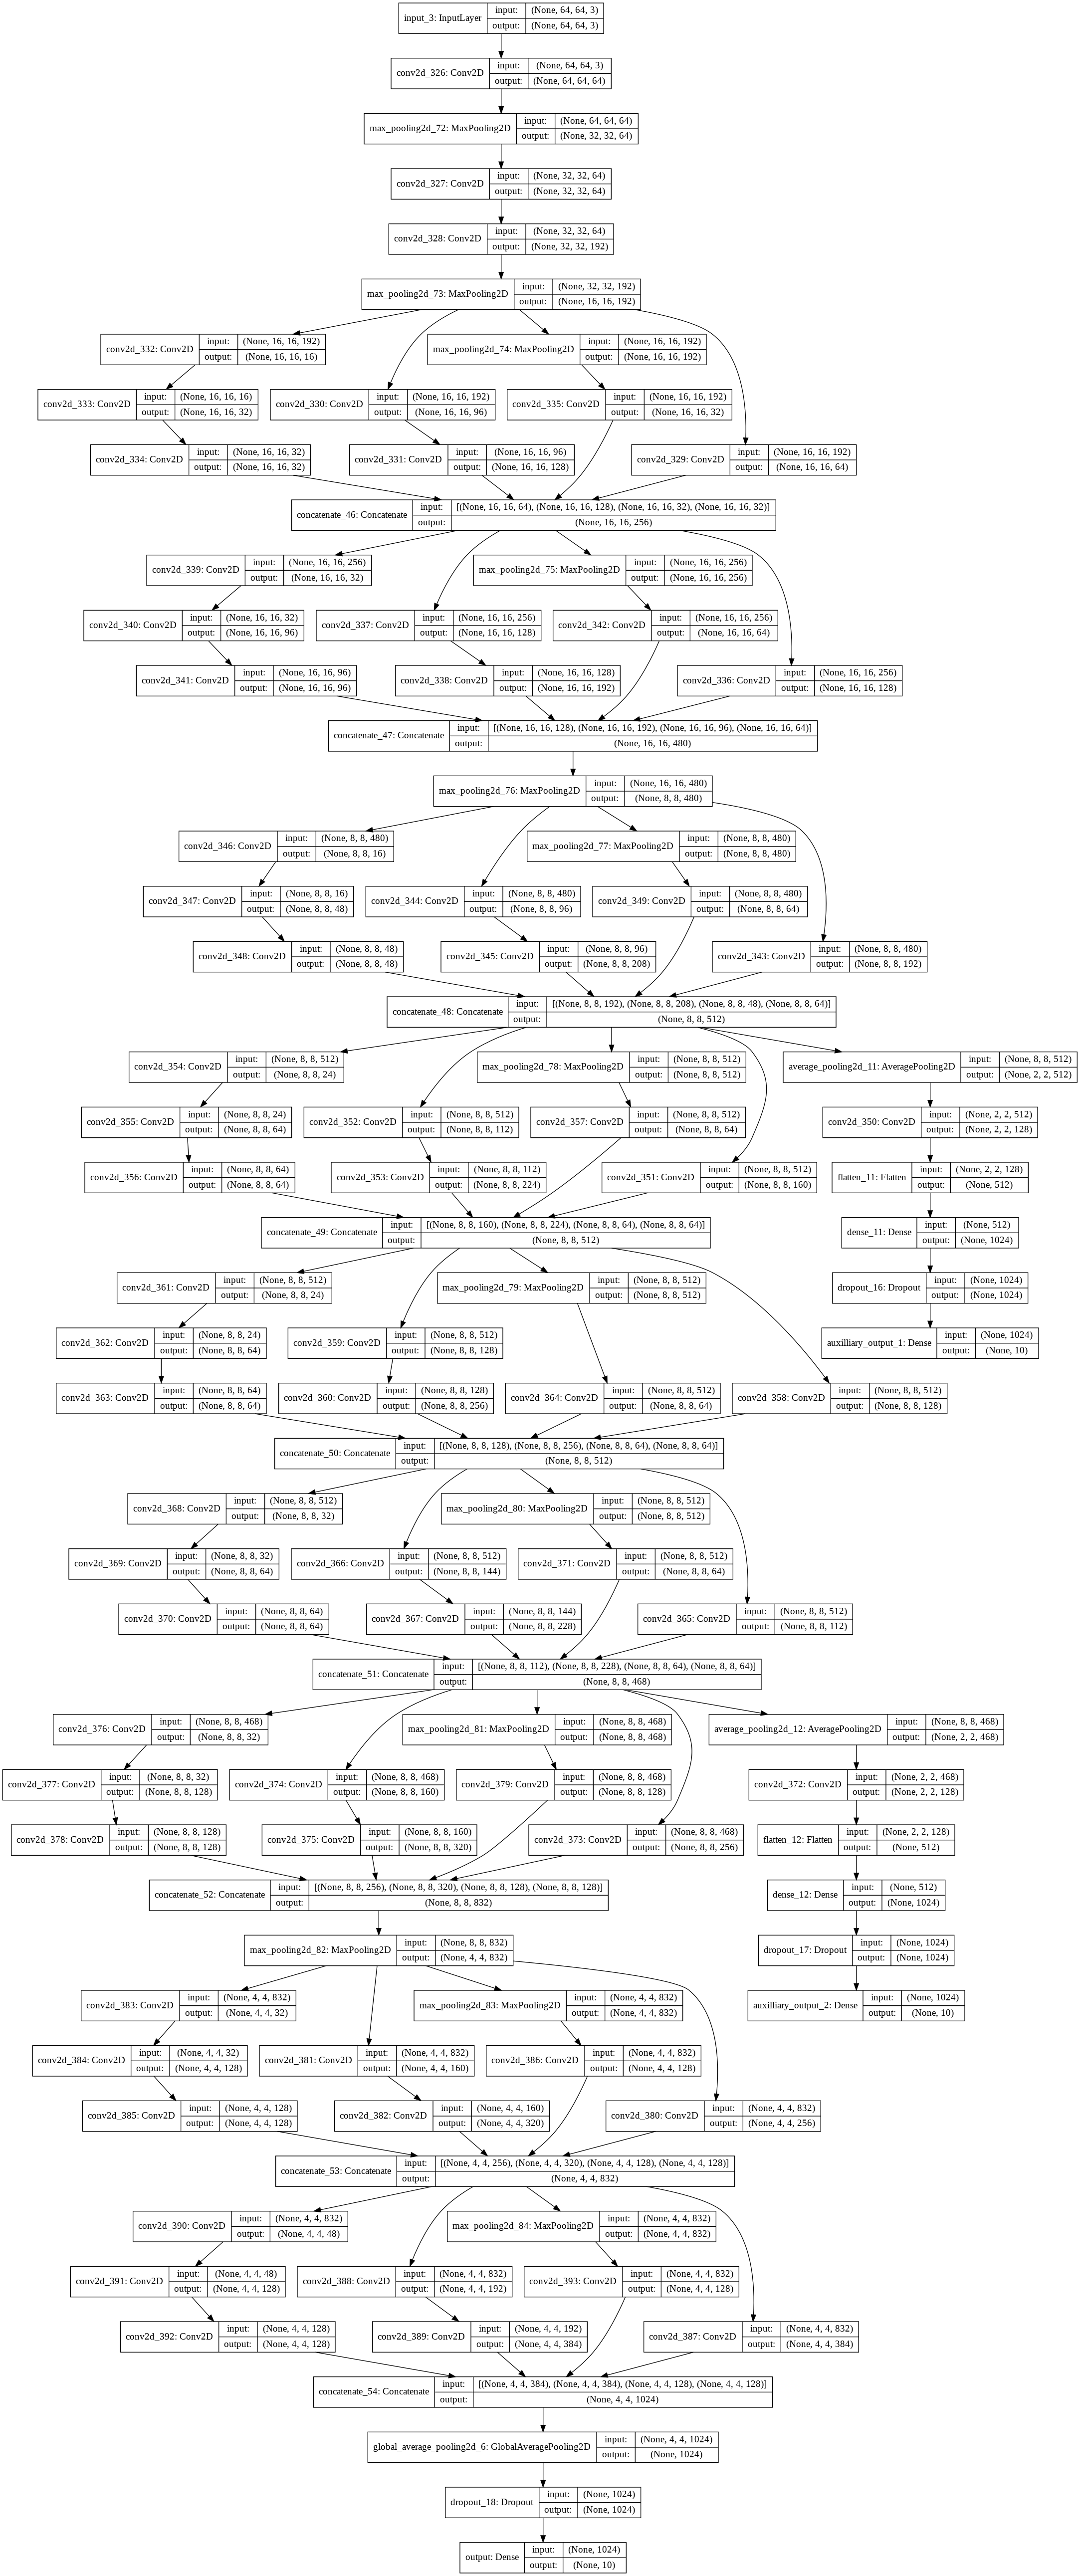

In [0]:
model_4 = model_v2(input_layer)
model_4.summary()
plot_model(model_4, to_file='model_4.png', show_shapes=True, show_layer_names=True)

In [0]:
opt = adam(lr=0.01, decay=1e-6)
model_4.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])
history = model_4.fit(train_features, [train_labels, train_labels, train_labels], validation_data=(test_features, [test_labels, test_labels, test_labels]), epochs=epochs, batch_size=256, callbacks=[lr_sc])

Train on 50000 samples, validate on 10000 samples
Epoch 1/25

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
50000/50000 [==============================] - 151s 3ms/step - loss: 2.9030 - auxilliary_output_1_loss: 1.7902 - auxilliary_output_2_loss: 1.8609 - output_loss: 1.8486 - auxilliary_output_1_acc: 0.3283 - auxilliary_output_2_acc: 0.2917 - output_acc: 0.2952 - val_loss: 2.6100 - val_auxilliary_output_1_loss: 1.6008 - val_auxilliary_output_2_loss: 1.6731 - val_output_loss: 1.6908 - val_auxilliary_output_1_acc: 0.4084 - val_auxilliary_output_2_acc: 0.3786 - val_output_acc: 0.3681
Epoch 2/25

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
50000/50000 [==============================] - 142s 3ms/step - loss: 2.6553 - auxilliary_output_1_loss: 1.6360 - auxilliary_output_2_loss: 1.7025 - output_loss: 1.6952 - auxilliary_output_1_acc: 0.3864 - auxilliary_output_2_acc: 0.3562 - output_acc: 0.3596 - val_loss: 2.5721 - val_auxilliary_output_1_loss: 1.588

dict_keys(['val_loss', 'val_auxilliary_output_1_loss', 'val_auxilliary_output_2_loss', 'val_output_loss', 'val_auxilliary_output_1_acc', 'val_auxilliary_output_2_acc', 'val_output_acc', 'loss', 'auxilliary_output_1_loss', 'auxilliary_output_2_loss', 'output_loss', 'auxilliary_output_1_acc', 'auxilliary_output_2_acc', 'output_acc', 'lr'])


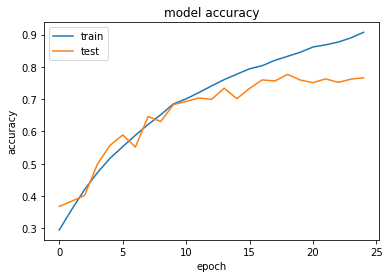

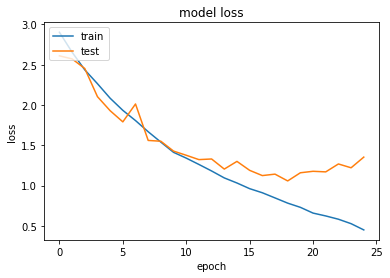

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['output_acc'])
plt.plot(history.history['val_output_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
y = np.argmax(test_labels, axis=-1)

In [0]:
print(y)

[3 8 8 ... 5 1 7]


In [0]:
print(np.shape(test_features))

(10000, 64, 64, 3)


In [0]:
def check(res):
  if res[0] == 0:
    print("plane")
  elif res[0] == 1:
    print("automobile")
  elif res[0] == 2:
    print("bird")
  elif res[0] == 3:
    print("cat")
  elif res[0] == 4:
    print("deer")
  elif res[0] == 5:
    print("dog")
  elif res[0] == 6:
    print("frog")
  elif res[0] == 7:
    print("horse")
  elif res[0] == 8:
    print("ship")
  elif res[0] == 9:
    print("truck")
  return

dog
None
ship
None
ship
None
plane
None
frog
None
frog
None
automobile
None
frog
None
cat
None
automobile
None


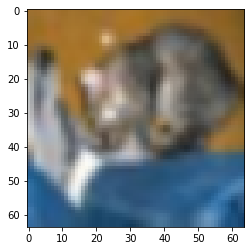

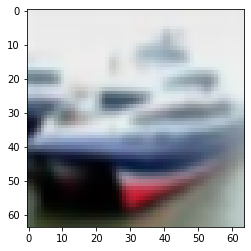

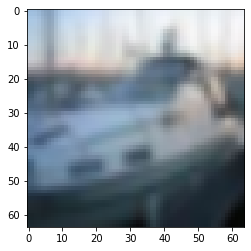

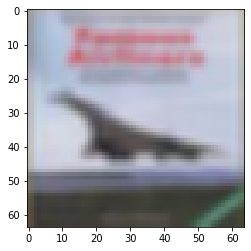

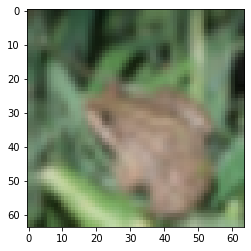

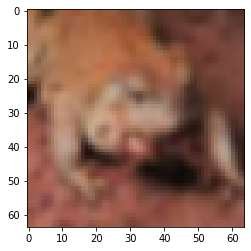

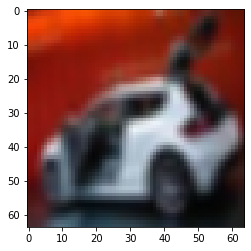

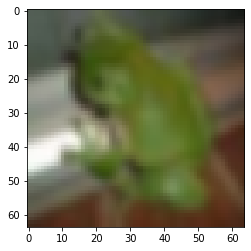

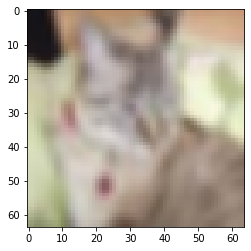

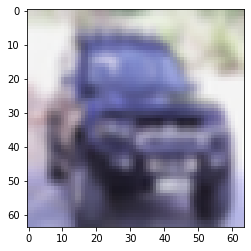

<Figure size 432x288 with 0 Axes>

In [0]:
for i in range(0,10):
  plt.imshow(test_features[i])
  im = test_features[i].reshape(1,64,64,3)
  plt.figure()
  x = model_4.predict(im)
  n,x,y = x
  res = np.argmax(n, axis=1)
  print(check(res))